In [ ]:
pip install -U albumentations

In [2]:
import albumentations as A
import cv2
import argparse
import numpy as np
import shutil
import os
from matplotlib import pyplot as plt
import random


train_folder_original = os.path.join(".","tmp", "train_set")
test_folder_original = os.path.join(".","tmp", "test_set")

train_folder_final = os.path.join(".","dataset", "train_set")
test_folder_final = os.path.join(".","dataset", "test_set")

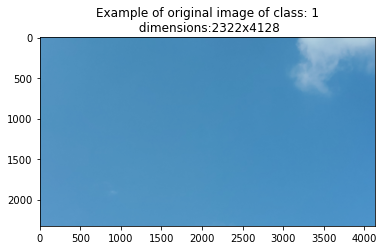

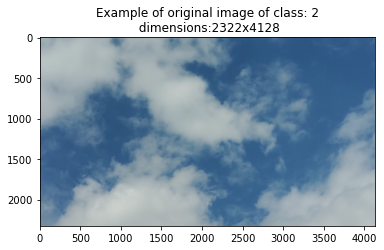

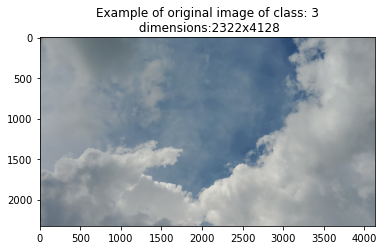

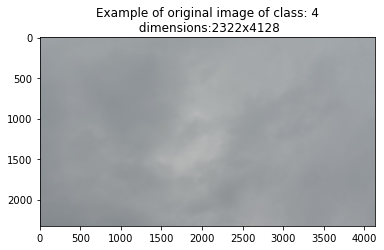

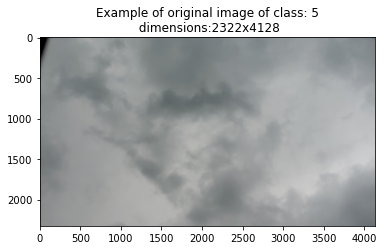

In [11]:
def get_files_from_folder(path):

    files = os.listdir(path)
    return np.asarray(files)

_, classes, _ = next(os.walk(train_folder_original))

def get_pictures_of_class(targetClass):
    path_to_original = os.path.join(train_folder_original, targetClass)
    classPath = path_to_original
    return classPath, get_files_from_folder(path_to_original)


for i in range(len(classes)):
    classPath, pictures = get_pictures_of_class(classes[i])
    randomIndex = random.randrange(0,len(pictures))
    imageName = os.path.join(classPath,pictures[randomIndex])
    image = cv2.imread(imageName)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.title(f"Example of original image of class: {classes[i]}\n dimensions:{image.shape[0]}x{image.shape[1]}")
    plt.imshow(image)
    plt.show()

In [3]:
# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=416, height=416),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
